In [1]:
import torch
import torchani
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_parquet('/home/nick/dr_comp6v1_chunked.pq')
df = df.reset_index()

In [3]:
df['Members magnitudes']

0        [[275.72918701171875, 277.3869934082031, 276.7...
1        [[127.9743881225586, 128.6508331298828, 133.17...
2        [[165.2073974609375, 156.5994110107422, 160.48...
3        [[66.6684341430664, 63.17159652709961, 65.5977...
4        [[129.26060485839844, 127.90589904785156, 129....
                               ...                        
99963    [[4.696032524108887, 4.193714618682861, 4.1699...
99964    [[4.357912540435791, 4.117323875427246, 3.9269...
99965    [[5.5297956466674805, 5.80279541015625, 5.4609...
99966    [[6.35361385345459, 5.994216442108154, 5.94572...
99967    [[6.538172721862793, 6.389937877655029, 6.2213...
Name: Members magnitudes, Length: 99968, dtype: object

In [4]:
print(df.loc[0])
#print(df['Members magnitudes'][0])

Species               [6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 1, 1, 1, ...
Formula                                                        C10H10N2
Dataset magnitudes    [276.4740905761719, 83.34327697753906, 104.347...
Members magnitudes    [[275.72918701171875, 277.3869934082031, 276.7...
Mean magnitudes       [276.7184753417969, 83.12069702148438, 103.159...
Stdev magnitudes      [2.031867504119873, 1.5849754810333252, 3.2914...
Name: 0, dtype: object


In [5]:
import pandas as pd
import numpy as np

new_df = pd.DataFrame(columns=['Formula', 'Species', 'Dataset magnitudes', 'Members magnitudes', 'Mean magnitudes', 'Stdev magnitudes'])

# Explode the 'Species' column
new_df['Species'] = df['Species'].explode(ignore_index=True)

# Explode the 'Dataset magnitudes' column
new_df['Dataset magnitudes'] = df['Dataset magnitudes'].explode(ignore_index=True)

# Explode the 'Members magnitudes' column
new_df['Members magnitudes'] = df['Members magnitudes'].explode(ignore_index=True)

# Explode the 'Mean magnitudes' column
new_df['Mean magnitudes'] = df['Mean magnitudes'].explode(ignore_index=True)

# Explode the 'Stdev magnitudes' column
new_df['Stdev magnitudes'] = df['Stdev magnitudes'].explode(ignore_index=True)

# Create a new column 'Formula_expanded' to hold the expanded 'Formula' values
new_df['Formula'] = df['Formula'].repeat(df['Species'].str.len()).reset_index(drop=True)

#new_df = new_df.drop('Formula',axis=1)

print(new_df)


          Formula Species Dataset magnitudes  \
0        C10H10N2       6         276.474091   
1        C10H10N2       6          83.343277   
2        C10H10N2       6         104.347771   
3        C10H10N2       6          76.920181   
4        C10H10N2       6          52.175129   
...           ...     ...                ...   
2497720      H4O2       1           5.483603   
2497721      H4O2       1           1.011587   
2497722      H4O2       8           5.339007   
2497723      H4O2       1           3.691998   
2497724      H4O2       1           3.681088   

                                        Members magnitudes Mean magnitudes  \
0        [275.72918701171875, 277.3869934082031, 276.74...      276.718475   
1        [81.81159973144531, 82.60348510742188, 85.2242...       83.120697   
2        [102.59690856933594, 104.40591430664062, 104.9...      103.159714   
3        [84.78058624267578, 85.04733276367188, 84.5010...       84.795715   
4        [58.37576675415039, 59.1

In [6]:
new_df

,Formula,Species,Dataset magnitudes,Members magnitudes,Mean magnitudes,Stdev magnitudes
0,C10H10N2,6,276.474091,"[275.72918701171875, 277.3869934082031, 276.74...",276.718475,2.031868
1,C10H10N2,6,83.343277,"[81.81159973144531, 82.60348510742188, 85.2242...",83.120697,1.584975
2,C10H10N2,6,104.347771,"[102.59690856933594, 104.40591430664062, 104.9...",103.159714,3.291451
3,C10H10N2,6,76.920181,"[84.78058624267578, 85.04733276367188, 84.5010...",84.795715,1.750601
4,C10H10N2,6,52.175129,"[58.37576675415039, 59.173248291015625, 52.819...",55.804024,3.230689
...,...,...,...,...,...,...
2497720,H4O2,1,5.483603,"[5.9992570877075195, 5.816261291503906, 5.5591...",5.590076,0.343675
2497721,H4O2,1,1.011587,"[0.8456839919090271, 1.061116099357605, 1.3786...",1.325004,0.369435
2497722,H4O2,8,5.339007,"[5.933831691741943, 5.6307854652404785, 4.9946...",5.29919,0.536105
2497723,H4O2,1,3.691998,"[4.036768436431885, 3.9044432640075684, 3.6290...",3.673004,0.336915


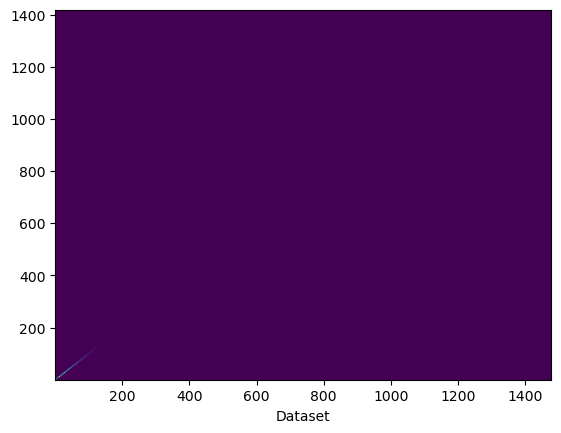

In [7]:
x = new_df['Mean magnitudes']
y = new_df['Dataset magnitudes']
bins = math.isqrt(len(new_df))
plt.hist2d(x,y, bins=bins)#, cmin=1)
plt.xlabel('Dataset')
plt.show()

In [8]:
# Step 1: Create a DataFrame with a single column containing all elements from 'Members magnitudes'
df_exploded = pd.DataFrame(new_df['Members magnitudes'].tolist(), index=new_df.index)

# Step 2: Merge the exploded DataFrame with the original DataFrame to include 'Dataset magnitudes' for each row
df_exploded = df_exploded.merge(new_df[['Dataset magnitudes']], left_index=True, right_index=True)

# Step 3: Melt the DataFrame to bring the elements of 'Members magnitudes' into separate rows
df_exploded = df_exploded.melt(id_vars='Dataset magnitudes', value_name='Members magnitudes')

# Drop the 'variable' column as it is not needed
df_exploded.drop(columns='variable', inplace=True)

# Display the updated DataFrame
print(df_exploded)


         Dataset magnitudes  Members magnitudes
0                276.474091          275.729187
1                 83.343277           81.811600
2                104.347771          102.596909
3                 76.920181           84.780586
4                 52.175129           58.375767
...                     ...                 ...
17484070           5.483603            4.908894
17484071           1.011587            1.996078
17484072           5.339007            4.381605
17484073           3.691998            2.993569
17484074           3.681088            2.982799

[17484075 rows x 2 columns]


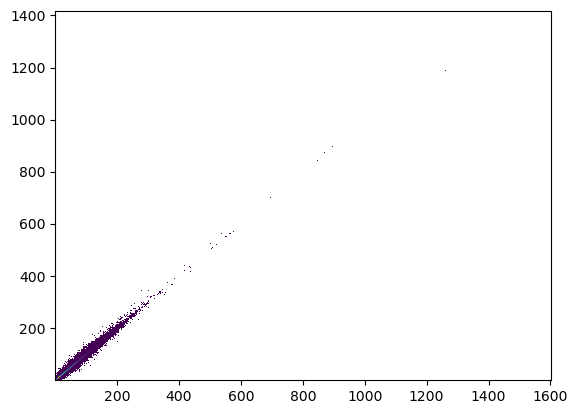

In [9]:
x = df_exploded['Members magnitudes']
y = df_exploded['Dataset magnitudes']
bins = math.isqrt(len(df_exploded))
plt.hist2d(x,y, bins=bins, cmin=1)
plt.show()

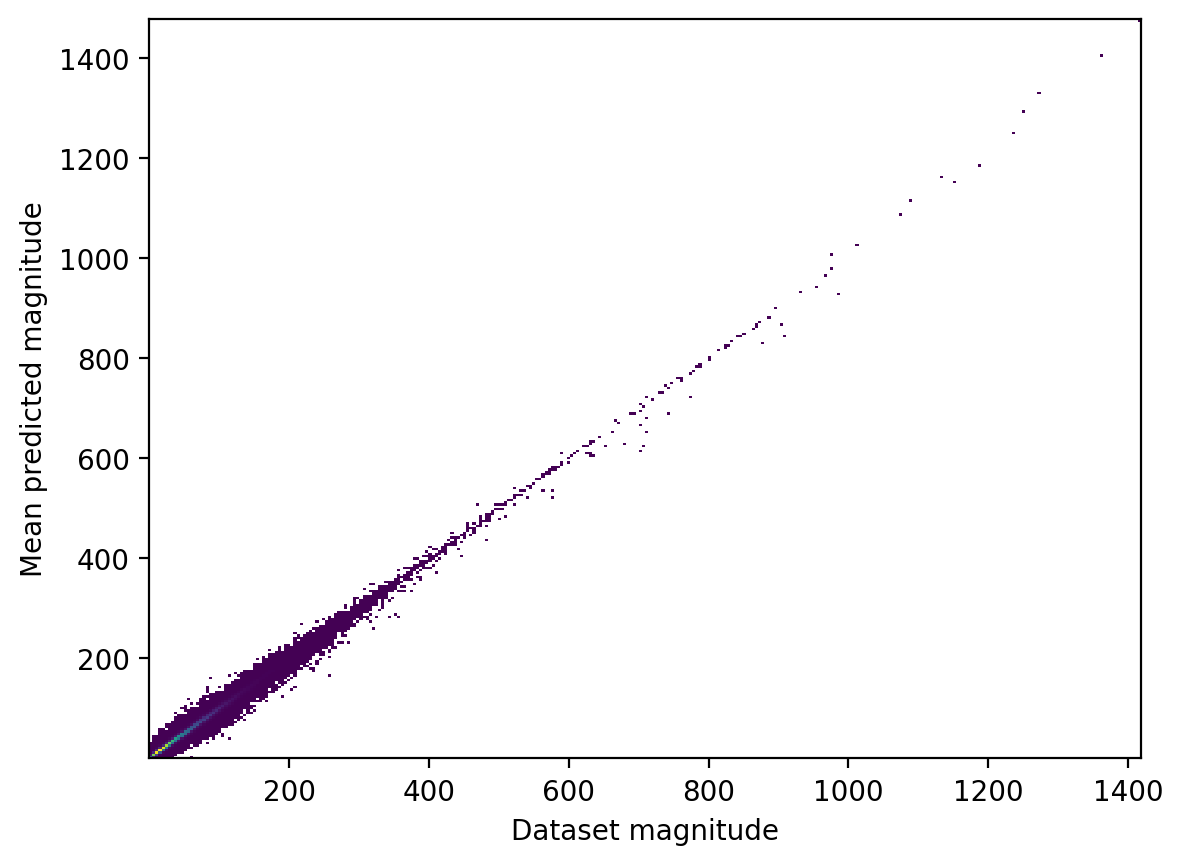

In [10]:
plt.rcParams['figure.dpi'] = 200
bins = math.isqrt(len(df))
xquant = np.quantile(new_df['Dataset magnitudes'],0.999)
yquant = np.quantile(new_df['Mean magnitudes'],0.999)
plt.hist2d(new_df['Dataset magnitudes'], new_df['Mean magnitudes'], bins=bins, cmin=1)#, range=[[0,xquant],[0,yquant]])
plt.xlabel('Dataset magnitude')
plt.ylabel('Mean predicted magnitude')
plt.show()

In [8]:
new_df['Difference'] = abs(new_df['Mean magnitudes']-new_df['Dataset magnitudes'])
new_df['Relative difference'] = new_df['Difference']/new_df['Dataset magnitudes']
new_df['Range'] = new_df['Members magnitudes'].apply(max) - new_df['Members magnitudes'].apply(min)

In [9]:
new_df

,Formula,Species,Dataset magnitudes,Members magnitudes,Mean magnitudes,Stdev magnitudes,Difference,Relative difference,Range
0,C10H10N2,6,276.474091,"[275.72918701171875, 277.3869934082031, 276.74...",276.718475,2.031868,0.244385,0.000884,5.846741
1,C10H10N2,6,83.343277,"[81.81159973144531, 82.60348510742188, 85.2242...",83.120697,1.584975,0.22258,0.002671,4.480034
2,C10H10N2,6,104.347771,"[102.59690856933594, 104.40591430664062, 104.9...",103.159714,3.291451,1.188057,0.011386,9.816856
3,C10H10N2,6,76.920181,"[84.78058624267578, 85.04733276367188, 84.5010...",84.795715,1.750601,7.875534,0.102386,5.593811
4,C10H10N2,6,52.175129,"[58.37576675415039, 59.173248291015625, 52.819...",55.804024,3.230689,3.628895,0.069552,7.643738
...,...,...,...,...,...,...,...,...,...
2497720,H4O2,1,5.483603,"[5.9992570877075195, 5.816261291503906, 5.5591...",5.590076,0.343675,0.106474,0.019417,1.090364
2497721,H4O2,1,1.011587,"[0.8456839919090271, 1.061116099357605, 1.3786...",1.325004,0.369435,0.313416,0.309826,1.150394
2497722,H4O2,8,5.339007,"[5.933831691741943, 5.6307854652404785, 4.9946...",5.29919,0.536105,0.039818,0.007458,1.552227
2497723,H4O2,1,3.691998,"[4.036768436431885, 3.9044432640075684, 3.6290...",3.673004,0.336915,0.018994,0.005145,1.043200


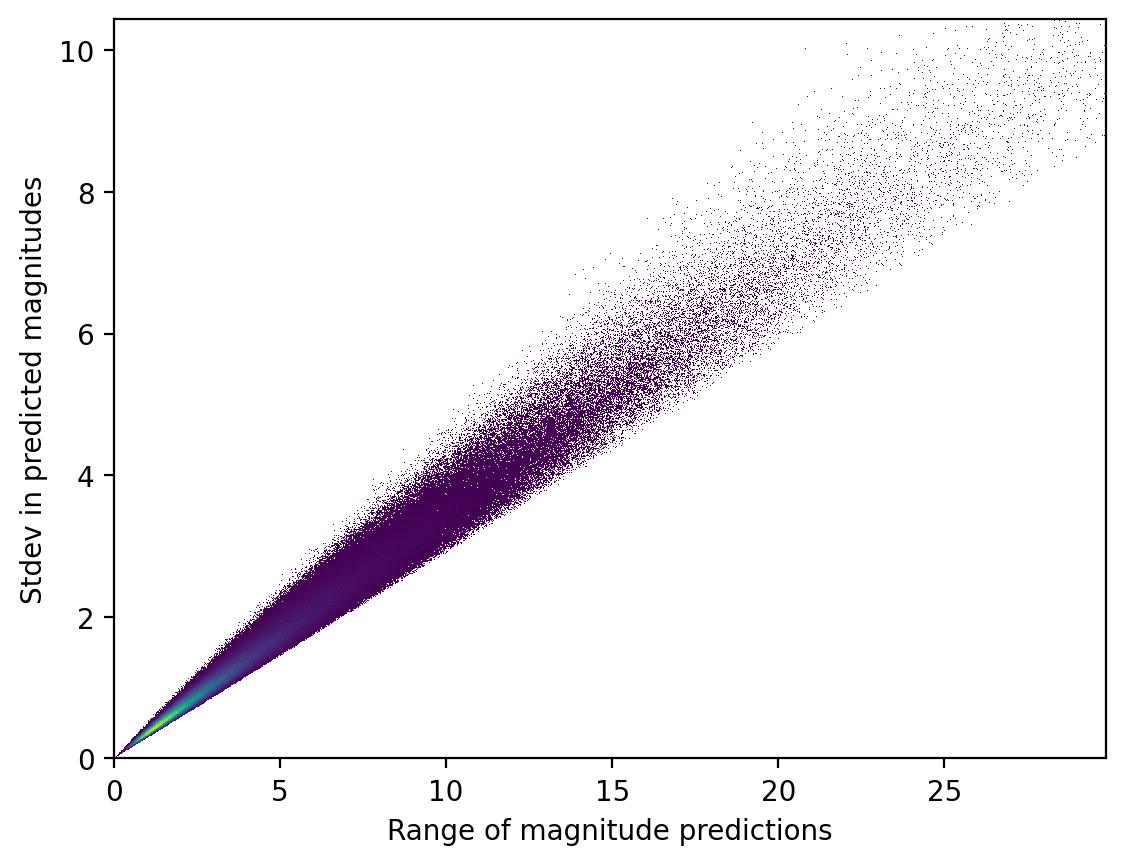

In [16]:
plt.rcParams['figure.dpi'] = 200
bins = math.isqrt(len(new_df))
xquant = np.quantile(new_df['Range'],0.999)
yquant = np.quantile(new_df['Stdev magnitudes'],0.999)
plt.hist2d(new_df['Range'], new_df['Stdev magnitudes'], bins=bins, cmin=1, range=[[0,xquant],[0,yquant]])
plt.xlabel('Range of magnitude predictions')
plt.ylabel('Stdev in predicted magnitudes')
plt.show()

In [31]:
print(new_df['x-range'])
print(new_df['Coef_var'])

0          0.021129
1          0.053898
2          0.095162
3          0.065968
4          0.136975
             ...   
2497720    0.195053
2497721    0.868219
2497722    0.292918
2497723    0.284018
2497724    0.284845
Name: x-range, Length: 2497725, dtype: object
0          0.007343
1          0.019068
2          0.031906
3          0.020645
4          0.057893
             ...   
2497720     0.06148
2497721    0.278818
2497722    0.101167
2497723    0.091727
2497724     0.09199
Name: Coef_var, Length: 2497725, dtype: object


In [27]:
new_df['Stdev magnitudes'] = pd.to_numeric(new_df['Stdev magnitudes'], errors='coerce')
r = new_df['Range'].corr(new_df['Stdev magnitudes'])
print(r)

0.9907090467138362


In [10]:
new_df['Difference'].mean(), new_df['Relative difference'].mean()

(2.0772187371583954, 0.06978695556596869)

In [28]:
new_df['x-range'] = (new_df['Members magnitudes'].apply(max) - new_df['Members magnitudes'].apply(min)) / new_df['Mean magnitudes']

In [29]:
new_df['Coef_var'] = new_df['Stdev magnitudes']/new_df['Mean magnitudes']

In [33]:
new_df['x-range'] = pd.to_numeric(new_df['x-range'], errors='coerce')
new_df['Coef_var'] = pd.to_numeric(new_df['Coef_var'], errors='coerce')
r = new_df['x-range'].corr(new_df['Coef_var'])
print(r)

0.9947176062463631


In [12]:
new_df.columns

Index(['Formula', 'Species', 'Dataset magnitudes', 'Members magnitudes',
       'Mean magnitudes', 'Stdev magnitudes', 'Difference',
       'Relative difference', 'x-range'],
      dtype='object')

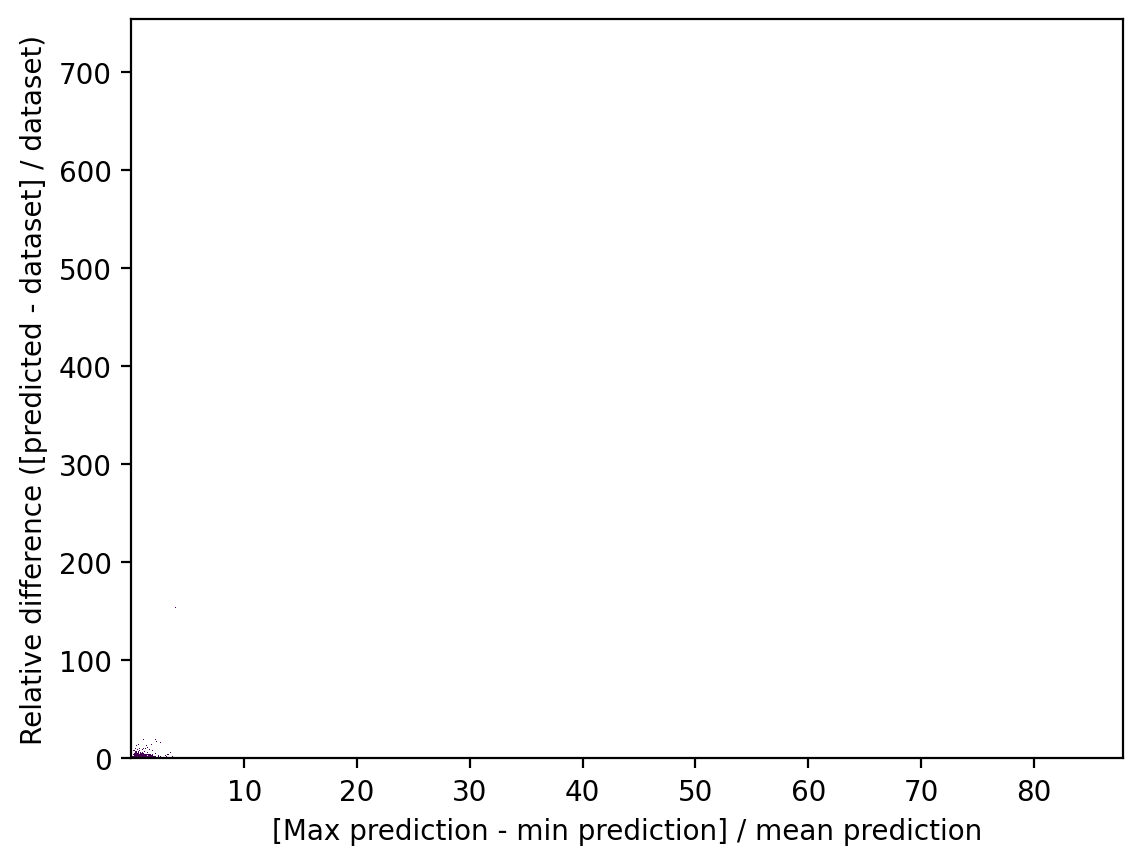

In [17]:
x = new_df['x-range']
y = new_df['Relative difference']
plt.hist2d(x,y, cmin=1, bins=(math.isqrt(len(new_df))))
plt.ylabel('Relative difference ([predicted - dataset] / dataset)')
plt.xlabel('[Max prediction - min prediction] / mean prediction')
plt.show()

In [14]:
med_value = new_df['Mean magnitudes'].median()

new_df['median x-range'] = (new_df['Members magnitudes'].apply(max) - new_df['Members magnitudes'].apply(min)) / med_value

In [15]:
threshold = np.quantile(new_df['median x-range'], 0.999)
filtered_df = new_df[new_df['median x-range'] > threshold]
print(len(filtered_df))
filtered_df

2498


,Formula,Species,Dataset magnitudes,Members magnitudes,Mean magnitudes,Stdev magnitudes,Difference,Relative difference,x-range,median x-range
400,C10H10N2,7,71.959557,"[50.25852584838867, 57.849708557128906, 40.552...",54.08696,11.08798,17.872597,0.24837,0.600979,0.890039
422,C10H10N2,7,138.152359,"[118.20886993408203, 123.72600555419922, 150.3...",130.092514,10.917806,8.059845,0.05834,0.246851,0.879315
3124,C10H10O3,6,224.695282,"[228.05421447753906, 207.58006286621094, 209.5...",210.898392,9.771894,13.79689,0.061403,0.155682,0.899018
4384,C10H11N,6,139.417984,"[119.99092102050781, 151.4657745361328, 132.23...",135.177017,11.921241,4.240967,0.030419,0.232842,0.861828
4534,C10H11N,6,216.234787,"[228.21302795410156, 226.42832946777344, 212.8...",224.968414,11.394029,8.733627,0.04039,0.136625,0.841606
...,...,...,...,...,...,...,...,...,...,...
2495320,C9H9NO,6,83.991905,"[70.30560302734375, 104.8189468383789, 76.2123...",78.892815,12.113935,5.099091,0.060709,0.437471,0.945027
2495326,C9H9NO,6,246.493347,"[238.02145385742188, 262.8338623046875, 245.46...",241.144958,14.289762,5.348389,0.021698,0.157985,1.043161
2495708,C9H9NO2,7,80.722931,"[83.4344482421875, 94.94186401367188, 96.19658...",85.54686,13.327814,4.823929,0.059759,0.427258,1.000810
2495771,C9H9NO2,7,136.798019,"[124.50653076171875, 125.63046264648438, 129.5...",125.795921,9.902582,11.002098,0.080426,0.267349,0.920877


In [44]:
new_df['x-range'].median(), new_df['x-range'].mean(), np.quantile(new_df['x-range'], 0.999)

(0.09246568003436677, 0.14272166222463686, 1.8854332294641243)

In [20]:
threshold = np.quantile(new_df['x-range'], 0.999)
filtered_df = new_df[new_df['x-range'] > threshold]
print(len(filtered_df))
filtered_df

2498


,Formula,Species,Dataset magnitudes,Members magnitudes,Mean magnitudes,Stdev magnitudes,Difference,Relative difference,x-range,median x-range
532,C10H10N2,1,0.520849,"[1.2732911109924316, 1.4912779331207275, 2.308...",0.755191,0.510557,0.234342,0.449923,2.074538,0.042898
538,C10H10N2,1,0.741813,"[0.5837382674217224, 0.43723544478416443, 0.84...",0.778782,0.705345,0.036969,0.049836,2.682978,0.057212
541,C10H10N2,1,0.735249,"[0.5376526117324829, 0.3967134654521942, 0.803...",0.75955,0.732604,0.024301,0.033051,2.864367,0.059572
547,C10H10N2,1,0.534405,"[1.3110487461090088, 1.4926837682724, 2.300752...",0.794621,0.494556,0.260216,0.486925,1.903019,0.041406
571,C10H10N2,1,0.483372,"[2.10182785987854, 1.9926893711090088, 1.85048...",1.500299,0.928568,1.016927,2.103819,1.900898,0.078090
...,...,...,...,...,...,...,...,...,...,...
2497584,CH7NO,1,1.107888,"[0.7018185257911682, 0.46531546115875244, 0.17...",0.758495,0.536045,0.349393,0.315368,2.216153,0.046027
2497586,CH7NO,1,1.109586,"[0.7056297659873962, 0.47649726271629333, 0.17...",0.768156,0.540883,0.34143,0.30771,2.210744,0.046499
2497610,CH7NO,6,1.009899,"[1.345198392868042, 1.6704277992248535, 0.6445...",0.352729,0.363065,0.657171,0.650729,2.908345,0.028089
2497631,CH7NO,1,0.73489,"[0.9267208576202393, 0.9781234860420227, 0.172...",0.81276,0.603139,0.07787,0.105962,2.005738,0.044637


In [33]:
new_df['Difference'].mean(), filtered_df['Difference'].mean()

(2.0772187371583954, 2.1715434639178417)

In [21]:
filtered_df['Formula'].nunique()

728

In [22]:
filtered_df['Species'].value_counts()[1]

1183

In [23]:
filtered_df['Species'].value_counts()[6]

696

In [24]:
filtered_df['Species'].value_counts()[7]

276

In [25]:
filtered_df['Species'].value_counts()[8]

343

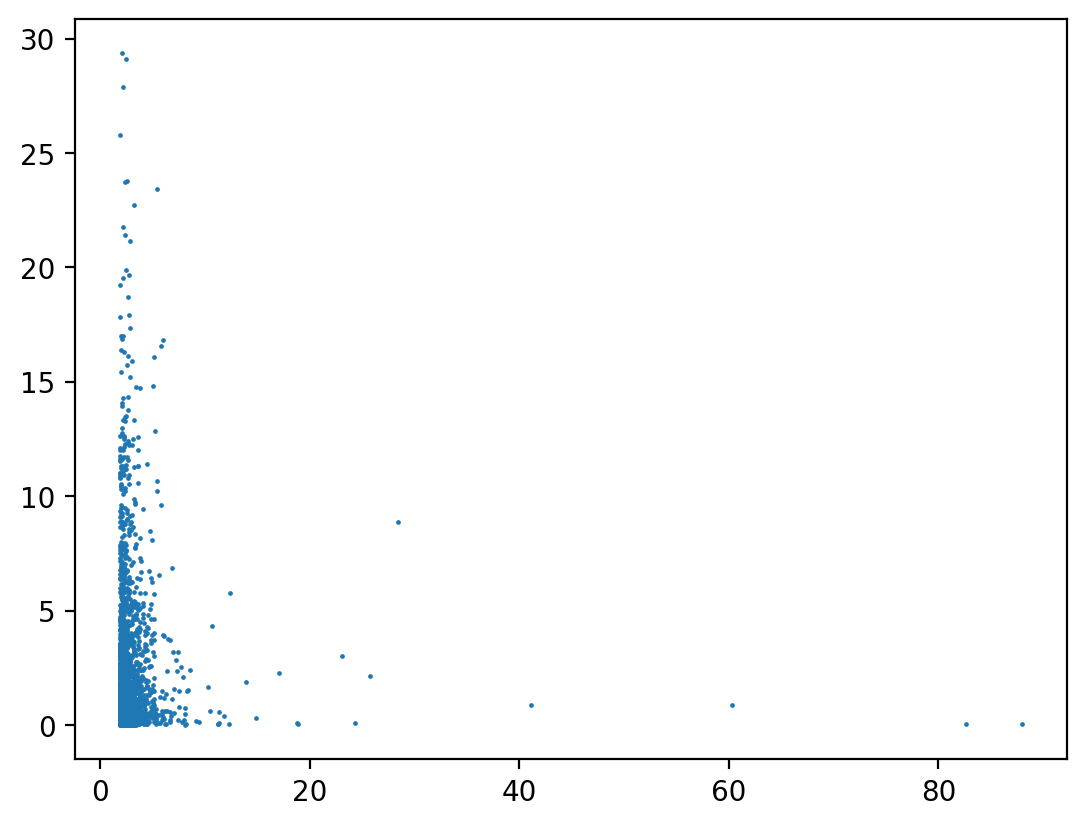

In [43]:
x = filtered_df['x-range']
y = filtered_df['Difference']
plt.scatter(x,y, s=0.5)#, cmin=1, bins=(math.isqrt(len(new_df))))
plt.show()

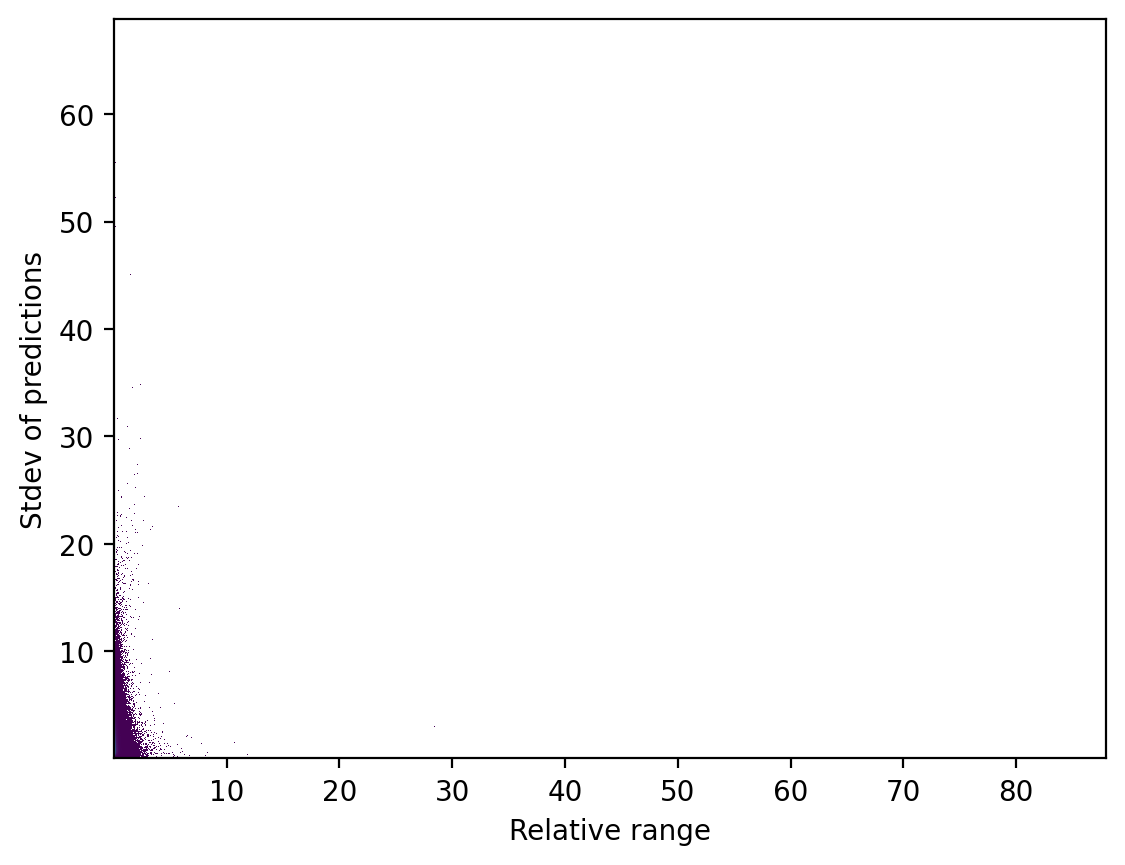

In [18]:
x = new_df['x-range']
y = new_df['Stdev magnitudes']
plt.hist2d(x,y, cmin=1, bins=(math.isqrt(len(new_df))))
plt.xlabel('Relative range')
plt.ylabel('Stdev of predictions')
plt.show()

In [15]:
new_df['x-range'] = new_df['x-range'].astype(float)
idx_max = new_df['x-range'].idxmax()
idx_min = new_df['x-range'].idxmin()

In [16]:
new_df.loc[idx_max]

Formula                                                             C4H4
Species                                                                1
Dataset magnitudes                                              0.037915
Members magnitudes     [0.3616507351398468, 0.2713082730770111, 0.007...
Mean magnitudes                                                 0.007536
Stdev magnitudes                                                0.239375
Difference                                                      0.030379
Relative difference                                             0.801243
x-range                                                        87.947945
Name: 1024106, dtype: object

In [17]:
rel_diff_max = new_df['Relative difference'].astype(float).idxmax()
new_df.loc[rel_diff_max]

Formula                                                             C4H4
Species                                                                1
Dataset magnitudes                                              0.002059
Members magnitudes     [2.9467875957489014, 1.1493980884552002, 0.843...
Mean magnitudes                                                 1.554079
Stdev magnitudes                                                 1.30274
Difference                                                      1.552021
Relative difference                                           753.954659
x-range                                                         2.201412
Name: 1024104, dtype: object

In [18]:
stdev_max = new_df['Stdev magnitudes'].astype(float).idxmax()
new_df.loc[stdev_max]

Formula                                                       C20H25N5O7
Species                                                                6
Dataset magnitudes                                           1418.307129
Members magnitudes     [1385.595458984375, 1481.2977294921875, 1504.4...
Mean magnitudes                                              1477.589233
Stdev magnitudes                                                68.84156
Difference                                                     59.282104
Relative difference                                             0.041798
x-range                                                         0.146867
Name: 618662, dtype: object

In [19]:
difference_max = new_df['Difference'].astype(float).idxmax()
new_df.loc[difference_max]

Formula                                                          C11H18O
Species                                                                6
Dataset magnitudes                                            703.761414
Members magnitudes     [627.2034301757812, 605.9928588867188, 616.528...
Mean magnitudes                                               612.787415
Stdev magnitudes                                                9.643813
Difference                                                     90.973999
Relative difference                                             0.129268
x-range                                                          0.04551
Name: 287203, dtype: object

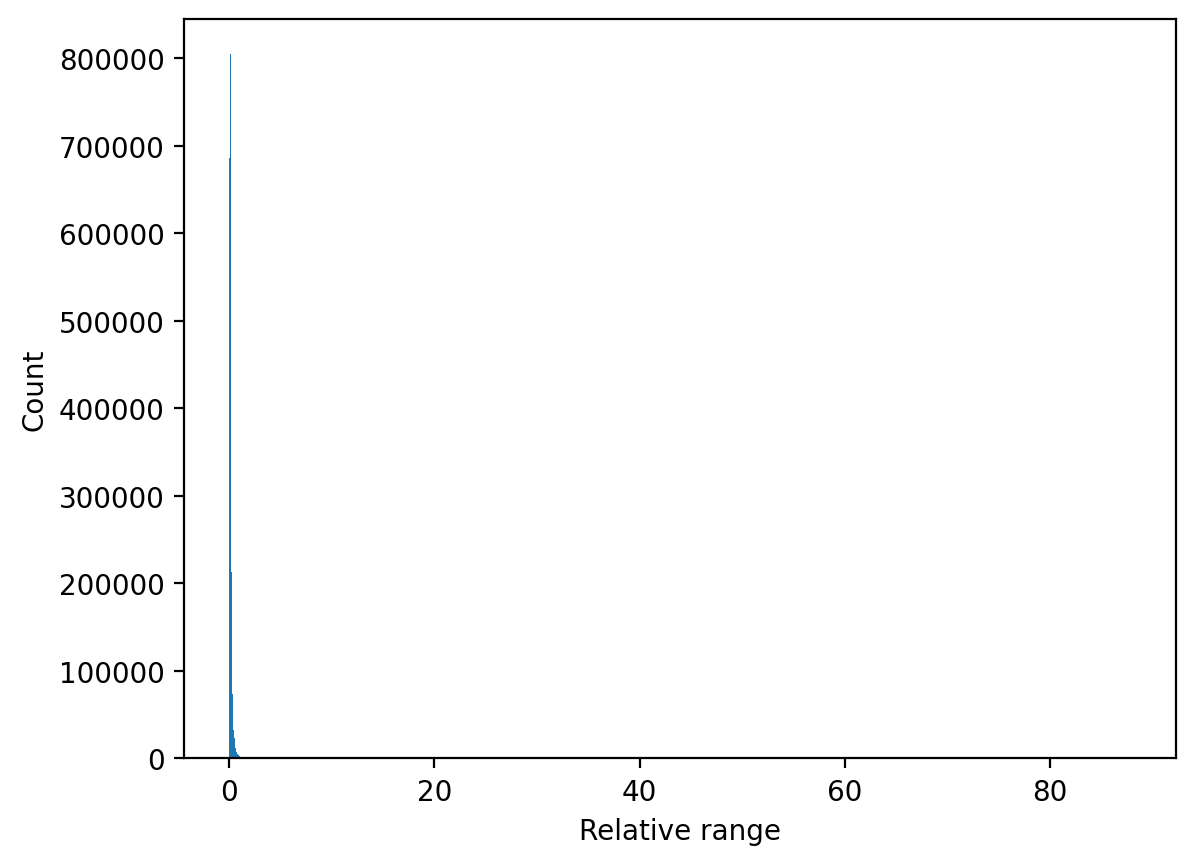

In [19]:
bins = math.isqrt(len(new_df['x-range'].values))
plt.hist(new_df['x-range'], bins=bins)#, range=[0,cut])
plt.xlabel('Relative range')
plt.ylabel('Count')
plt.show()

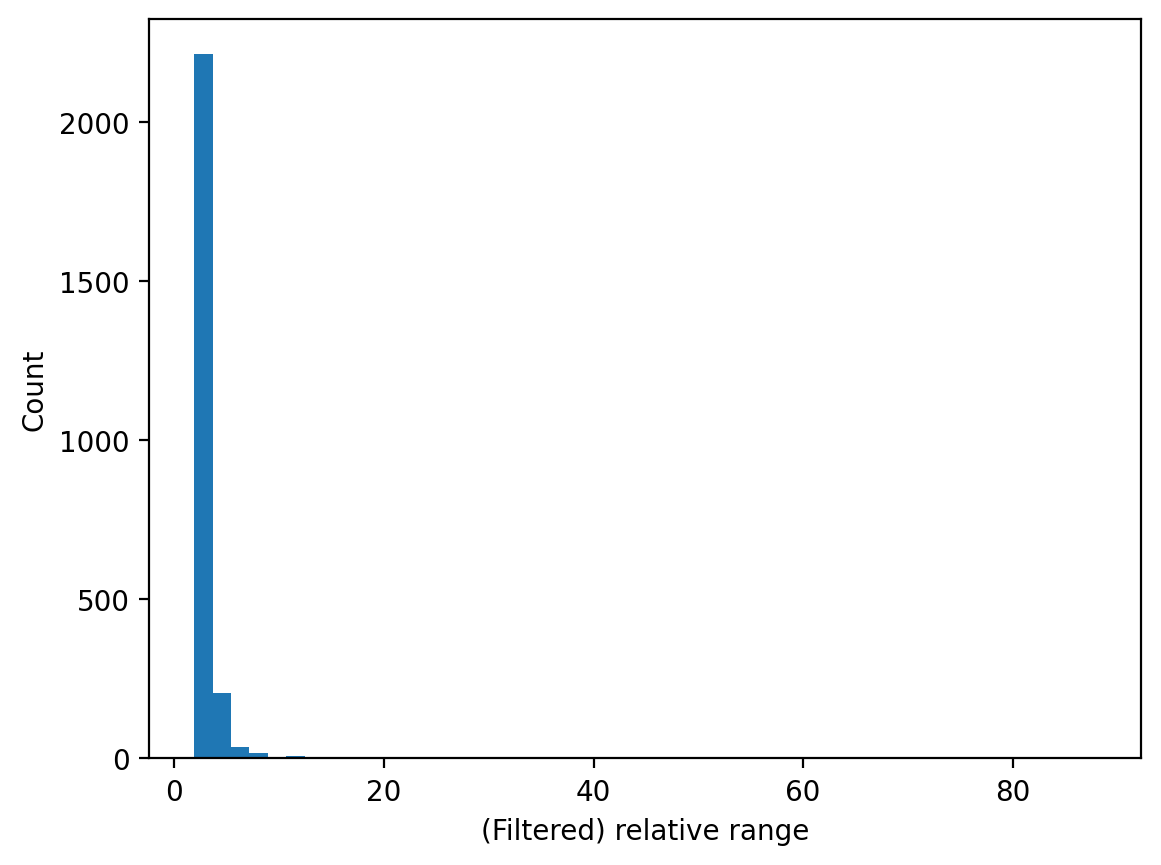

In [27]:
bins = math.isqrt(len(filtered_df['x-range'].values))
plt.hist(filtered_df['x-range'], bins=bins)#, range=[0,cut])
plt.xlabel('(Filtered) relative range')
plt.ylabel('Count')
plt.show()

In [21]:
new_df['x-range'].mean()

0.14272166222463686

1.8854617724285694
17200


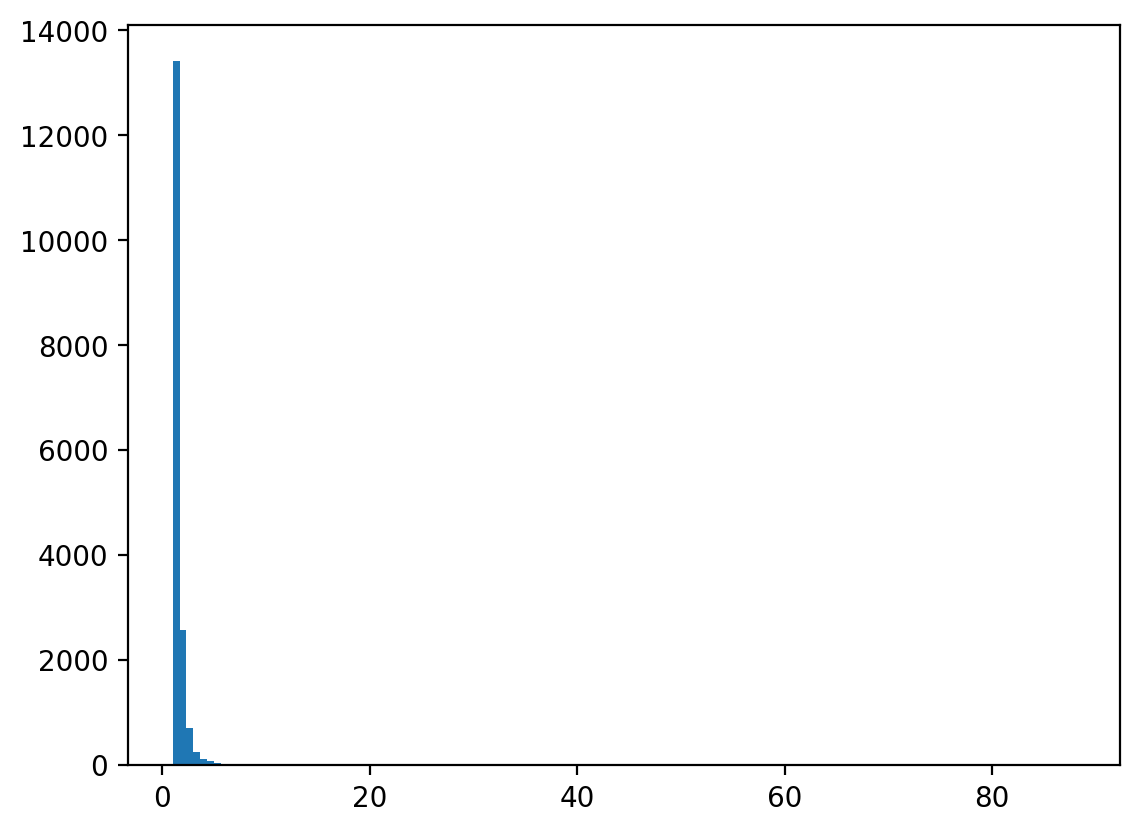

In [33]:
percentile = new_df['x-range'].quantile(0.999)
print(percentile)
top_percentile = new_df[new_df['x-range'] > 1]
print(len(top_percentile))
bins = math.isqrt(len(top_percentile))
plt.hist(top_percentile['x-range'], bins=bins)#, range=[10,max(df['Abs Z-score sum'])])
plt.show()

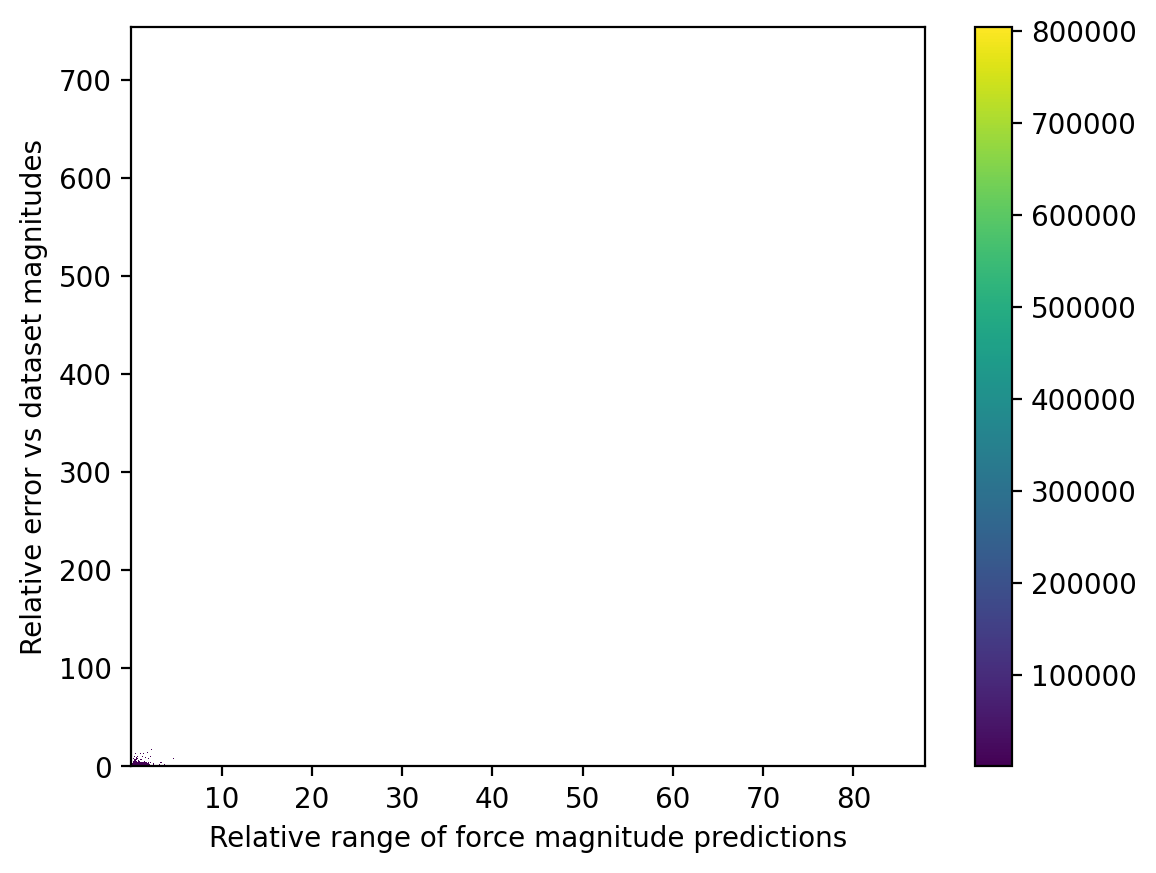

In [22]:
xquant = np.quantile(new_df['x-range'],0.999)
yquant = np.quantile(new_df['Relative difference'],0.999)
plt.hist2d(new_df['x-range'],new_df['Relative difference'], bins=math.isqrt(len(new_df)), cmin=1)#, range=[[0,xquant],[0,yquant]])
plt.xlabel('Relative range of force magnitude predictions')
plt.colorbar()
plt.ylabel('Relative error vs dataset magnitudes')
plt.show()

In [ ]:
print(len(top_percentile))
top_percentile.mean(), new_df.mean()

17200


/tmp/ipykernel_818/2043691636.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_percentile.mean(), new_df.mean()


In [17]:
df['Z-score'] = df.apply(lambda row: [(member - row['Mean magnitudes']) / row['Stdev magnitudes'] for member in row['Members magnitudes']], axis=1)

In [18]:
df['Abs Z-score sum'] = df['Z-score'].apply(lambda z_scores: sum(abs(score) for score in z_scores))

In [19]:
len(df['Abs Z-score sum'])

2608858

In [ ]:
max(df['Abs Z-score sum'])

In [ ]:
df['Abs Z-score sum'].mean()

In [ ]:
matplotlib.rcParams['font.family'] = 'Times New Roman'

In [ ]:
bins = math.isqrt(len(df['Abs Z-score sum'].values))
plt.hist(df['Abs Z-score sum'], bins=bins)#, range[[0,max(df['Abs Z-score sum'])],[0,10]])
plt.xlabel('Sum of z-score absolute values across ensemble')
plt.show()

In [6]:
df['Difference'].idxmax()

6

In [6]:
h_df = df.loc[1]
c_df = df.loc[6]
n_df = df.loc[7]
o_df = df.loc[8]

In [7]:
'''font = {'family': 'serif',
        'serif':  'Times New Roman',
        'color':  'violet',
        'weight': 'normal',
        'size': 16,
        }
'''

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Times New Roman') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 12, 'font.serif':'Times New Roman'})

2608858
Stdev 95th percentile 3.888354861736297
Error in mean predicted magnitude 95th percentile 7.155360794067381


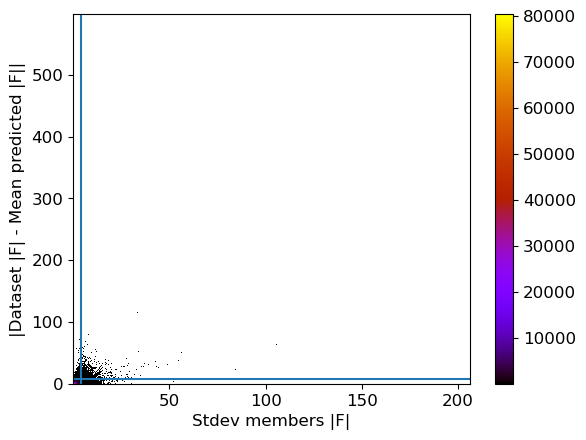

In [9]:
x = df['Stdev magnitudes']
y = df['Difference']
print(len(x))
xquant95 = np.quantile(x,0.95)
yquant95 = np.quantile(y,0.95)
print('Stdev 95th percentile',xquant95)
print('Error in mean predicted magnitude 95th percentile', yquant95)
plt.hist2d(x,y,bins=(math.isqrt(len(df)),math.isqrt(len(df))),cmin=1,cmap=plt.cm.gnuplot)#, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Stdev members |F|')
plt.ylabel('|Dataset |F| - Mean predicted |F||')#, fontdict=font)
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

1352100


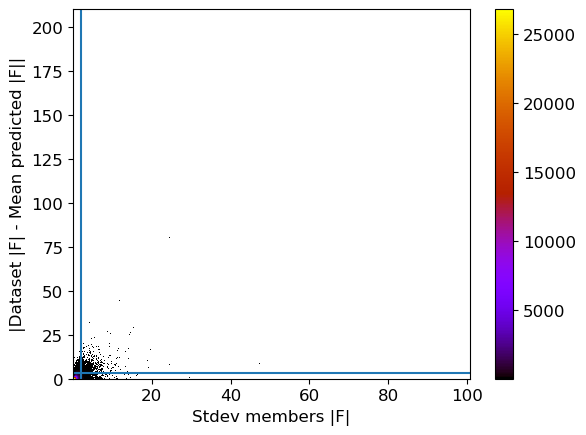

In [10]:
x = h_df['Stdev magnitudes'].to_numpy()
y = h_df['Difference'].to_numpy()
print(len(x))
xquant95 = np.quantile(x,0.95)
yquant95 = np.quantile(y,0.95)
plt.hist2d(x,y,bins=(math.isqrt(len(h_df)),math.isqrt(len(h_df))),cmin=1,cmap=plt.cm.gnuplot)#, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Stdev members |F|')
plt.ylabel('|Dataset |F| - Mean predicted |F||')
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

890691


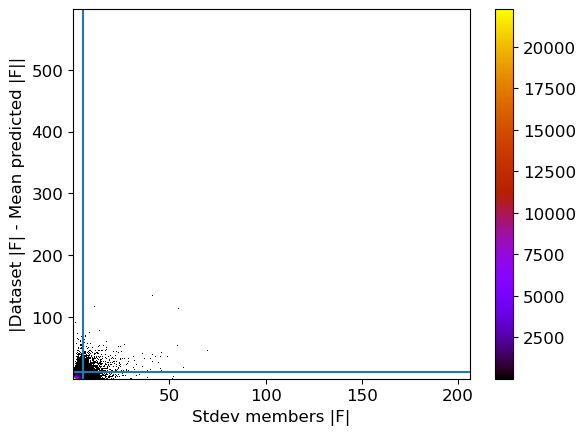

In [11]:
x = c_df['Stdev magnitudes'].to_numpy()
y = c_df['Difference'].to_numpy()
print(len(x))
xquant95 = np.quantile(x,0.95)
yquant95 = np.quantile(y,0.95)
plt.hist2d(x,y,bins=(math.isqrt(len(c_df)),math.isqrt(len(c_df))),cmin=1,cmap=plt.cm.gnuplot)#, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Stdev members |F|')
plt.ylabel('|Dataset |F| - Mean predicted |F||')
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

193592


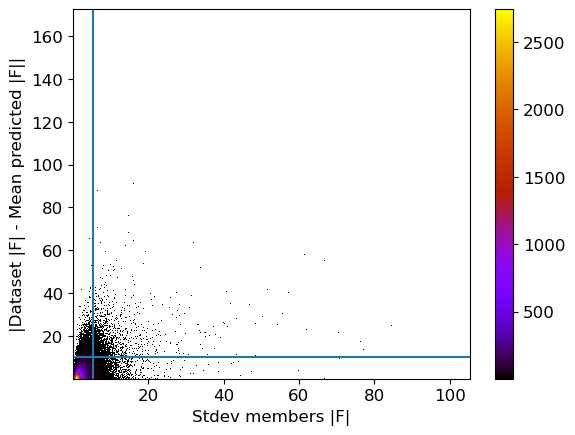

In [12]:
x = n_df['Stdev magnitudes'].to_numpy()
y = n_df['Difference'].to_numpy()
print(len(x))
xquant95 = np.quantile(x,0.95)
yquant95 = np.quantile(y,0.95)
plt.hist2d(x,y,bins=(math.isqrt(len(n_df)),math.isqrt(len(n_df))),cmin=1,cmap=plt.cm.gnuplot)#, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Stdev members |F|')
plt.ylabel('|Dataset |F| - Mean predicted |F||')
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

172475


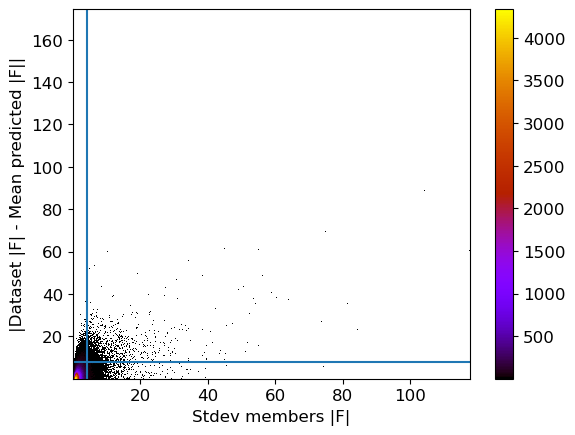

In [13]:
x = o_df['Stdev magnitudes'].to_numpy()
y = o_df['Difference'].to_numpy()
print(len(x))
xquant95 = np.quantile(x,0.95)
yquant95 = np.quantile(y,0.95)
plt.hist2d(x,y,bins=(math.isqrt(len(o_df)),math.isqrt(len(o_df))),cmin=1,cmap=plt.cm.gnuplot)#, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Stdev members |F|')
plt.ylabel('|Dataset |F| - Mean predicted |F||')
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

In [14]:
print(sum([len(h_df),len(c_df),len(n_df),len(o_df)]))

2608858


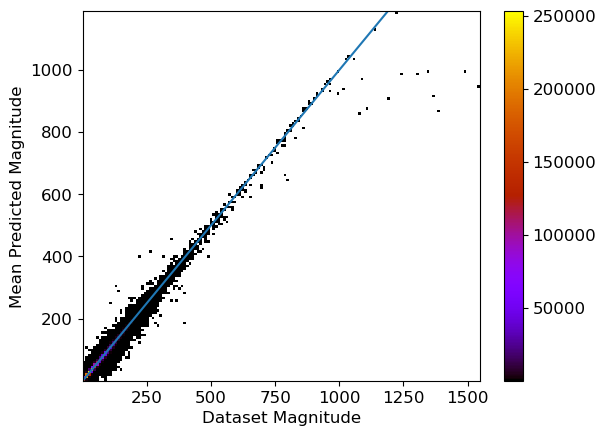

In [15]:
x = df['Dataset magnitudes'].to_numpy()
y = df['Mean magnitudes'].to_numpy()
xquant95 = np.quantile(x,0.99)
yquant95 = np.quantile(y,0.99)

plt.hist2d(x,y,bins=(150,150),cmin=0.1,cmap=plt.cm.gnuplot)#, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Dataset Magnitude')
plt.ylabel('Mean Predicted Magnitude')
plt.axline((0, 0), slope=1)
plt.colorbar()
plt.show()

890691


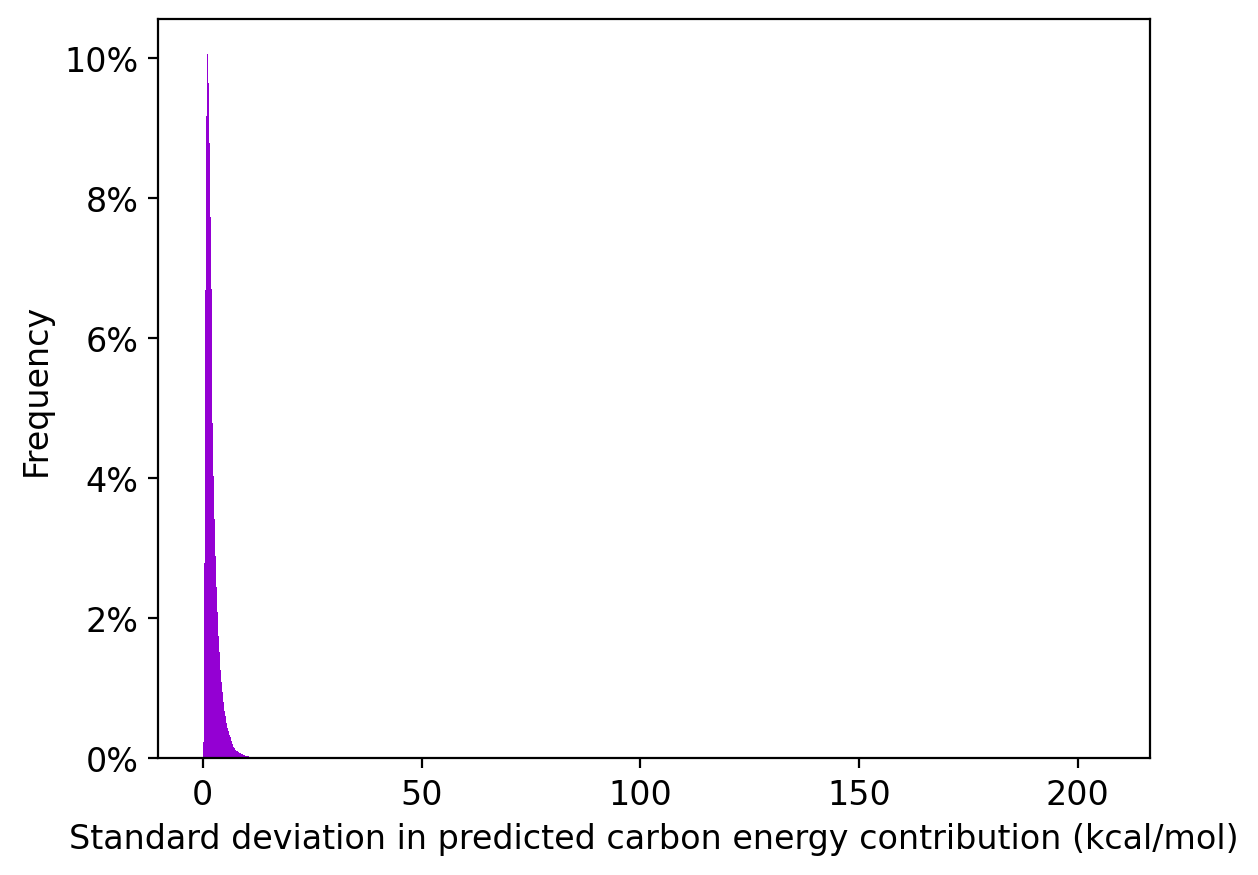

In [27]:
from matplotlib.ticker import PercentFormatter
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
# Carbon histograms
print(len(c_df))



plt.hist(c_df['Stdev magnitudes'],bins=math.isqrt(len(c_df)),weights=(np.ones(len(c_df)) / len(c_df)),color='darkviolet')#, range=[0,10])

plt.gca().yaxis.set_major_formatter(PercentFormatter(1,decimals=0))

#plt.axvline(x = 7.436886, color = 'r', label = 'axvline - full height')


plt.xlabel('Standard deviation in predicted carbon energy contribution (kcal/mol)')
plt.ylabel('Frequency')
#plt.title('ANI-1x first conformer subset')
plt.show()

# Convert Dataset magnitudes column
magnitudes_df['Dataset magnitudes'] = magnitudes_df['Dataset magnitudes'].apply(lambda x: x.numpy())

# Convert Members magnitudes column
magnitudes_df['Members magnitudes'] = magnitudes_df['Members magnitudes'].apply(lambda x: np.array([item.numpy() for item in x]))

# Convert Mean magnitudes column
magnitudes_df['Mean magnitudes'] = magnitudes_df['Mean magnitudes'].apply(lambda x: x.numpy())

# Convert Stdev magnitudes column
magnitudes_df['Stdev magnitudes'] = magnitudes_df['Stdev magnitudes'].apply(lambda x: x.numpy())

# Convert Difference column
magnitudes_df['Difference'] = magnitudes_df['Difference'].apply(lambda x: x.numpy())

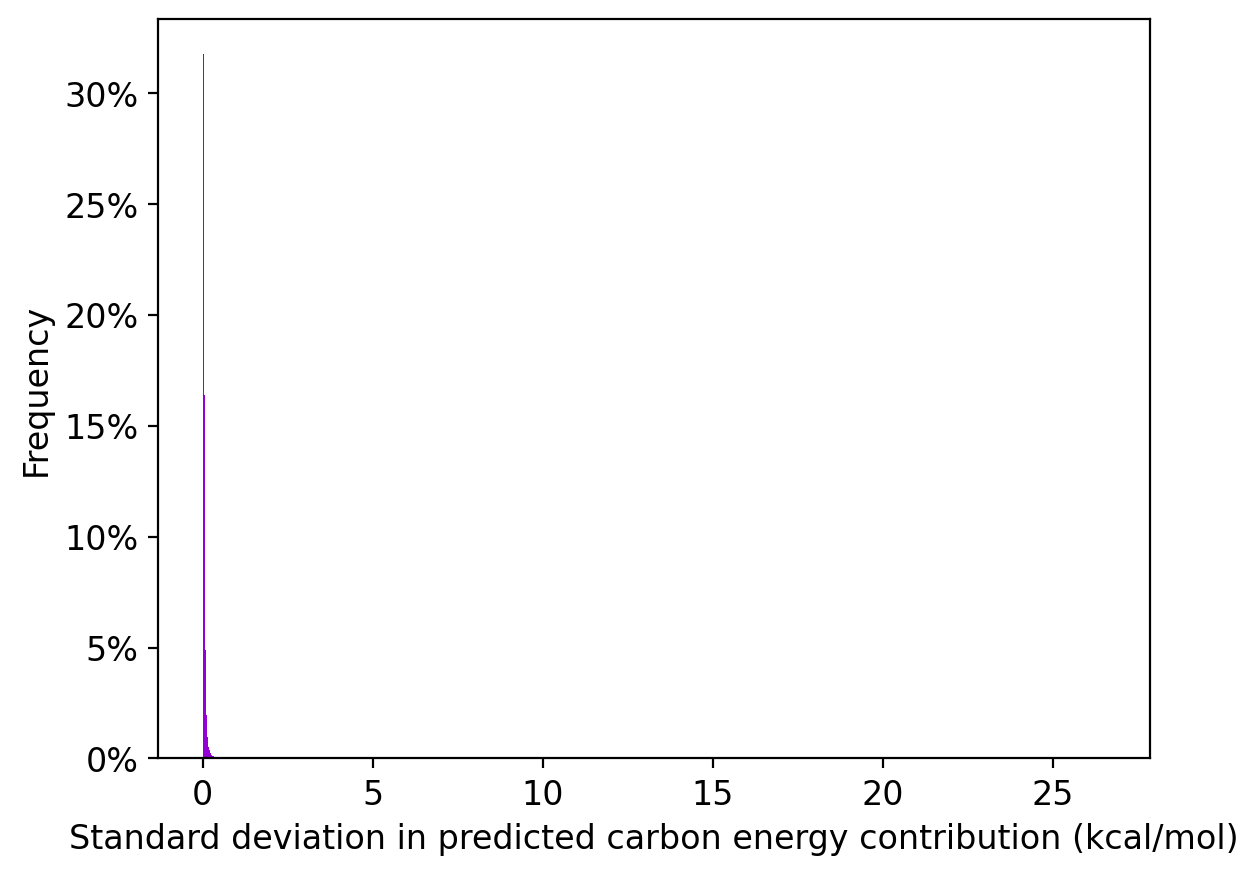

In [31]:
data = df['Stdev magnitudes'] / df['Mean magnitudes']



plt.hist(data,bins=math.isqrt(len(data)),weights=(np.ones(len(data)) / len(data)),color='darkviolet')#, range=[0,10])

plt.gca().yaxis.set_major_formatter(PercentFormatter(1,decimals=0))

#plt.axvline(x = 7.436886, color = 'r', label = 'axvline - full height')


plt.xlabel('Standard deviation in predicted carbon energy contribution (kcal/mol)')
plt.ylabel('Frequency')
#plt.title('ANI-1x first conformer subset')
plt.show()